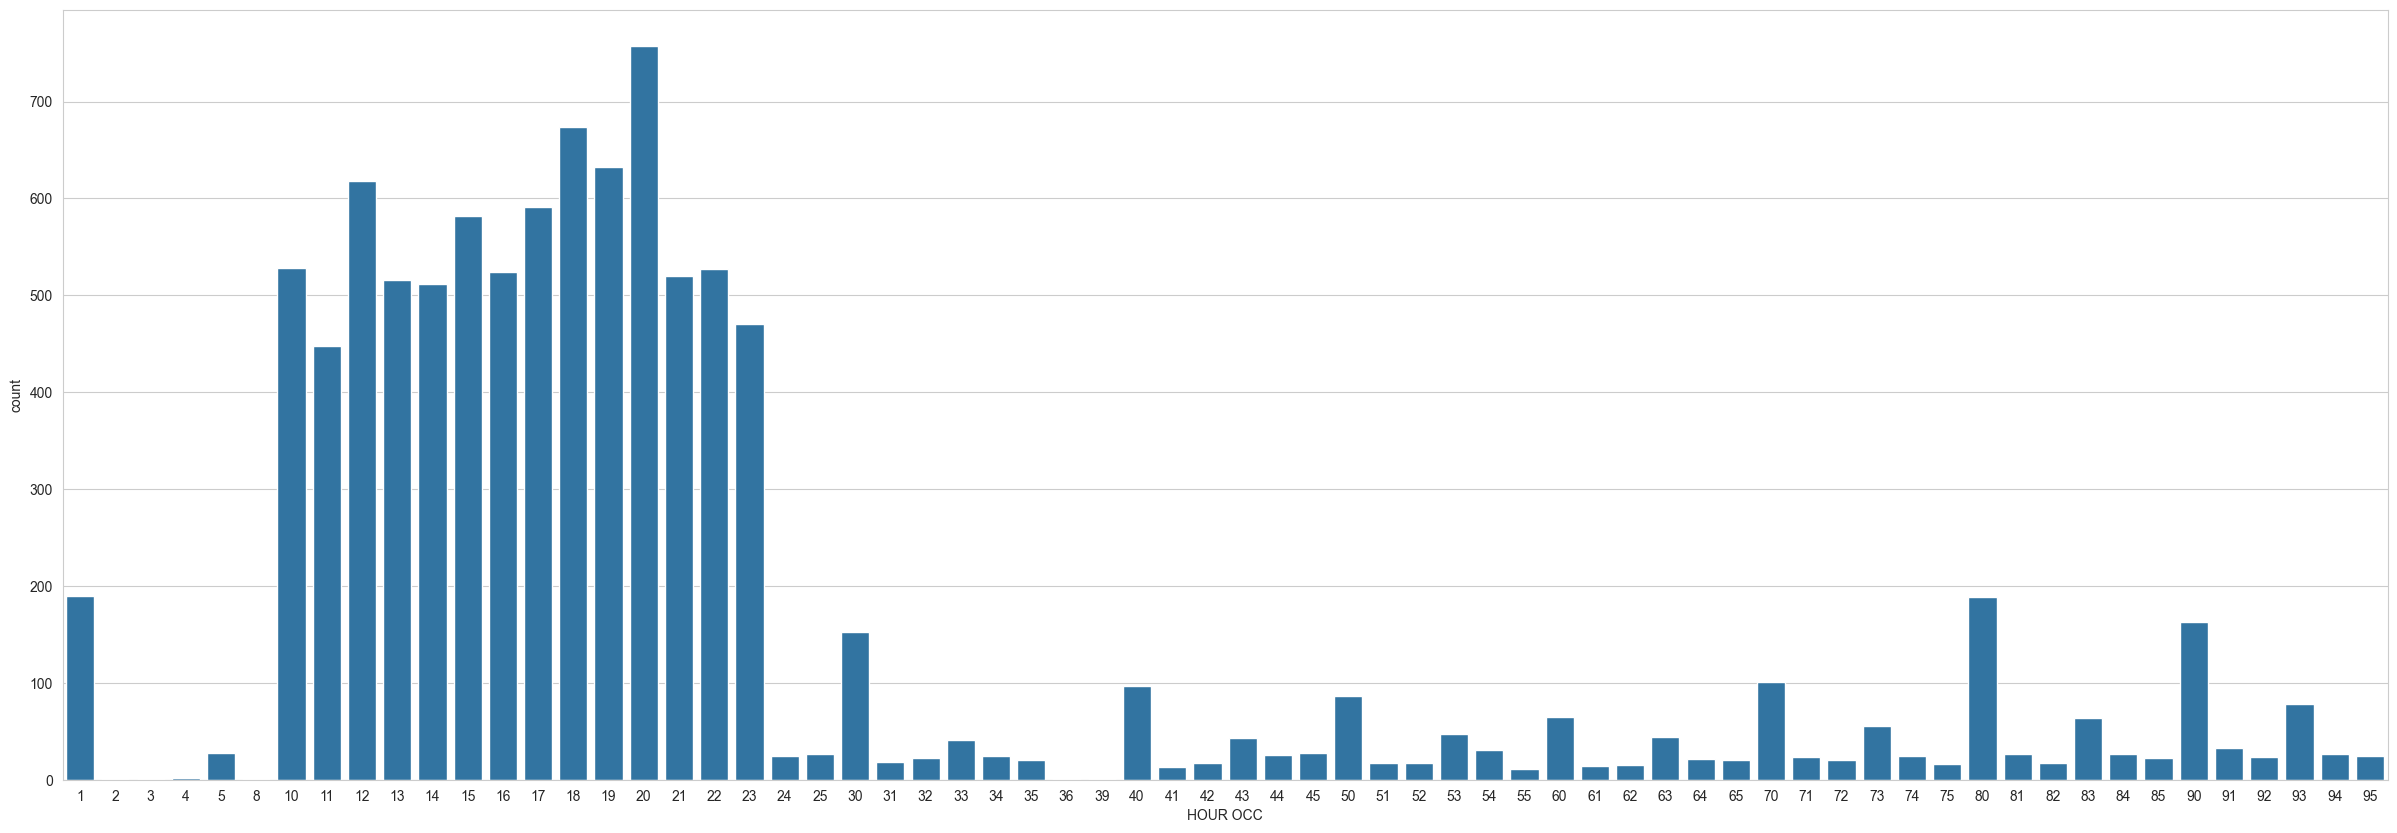

The hour with the highest frequency of crimes is 20 and the area with the highest frequency of night crimes is Harbor
Age Bracket
26-34    2004
35-44    1730
45-54    1276
18-25    1232
55-64    1043
65+       626
0-17      187
Name: count, dtype: int64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

date_format = '%m/%d/%Y %I:%M:%S %p'
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], date_format=date_format, dtype={"TIME OCC": str})

crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
peak_crime_hour = crimes["HOUR OCC"].value_counts().idxmax()

crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
plt.figure(figsize=(30, 10)) 
sb.set_style("whitegrid")
sb.countplot(data=crimes, x="HOUR OCC")
plt.show()

freq_crimes = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]
peak_night_crime_location = freq_crimes["AREA NAME"].value_counts().idxmax()
print(f"The hour with the highest frequency of crimes is {peak_crime_hour} and the area with the highest frequency of night crimes is {peak_night_crime_location}")

ages = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_ranges = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], bins=ages, labels=age_ranges)
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)